# **DATA CLEANING**

### 1. Import Data

In [1]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import warnings 
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import ttest_ind

In [2]:
# Import the data 
transaction = pd.read_excel('Dataset/QVI_transaction_data.xlsx')
customer = pd.read_csv('Dataset/QVI_purchase_behaviour.csv')

In [3]:
# Print out the data 
print('Transaction data: Top 5 & Bottom 5 rows')
display(transaction.head(5))
print('-'*50)
display(transaction.tail(5))
print('\n')
print('-'*140,'\n','-'*140)
print('\n')
print('Customer data: Top 5 & Bottom 5 rows')
display(customer.head(5))
print('-'*50)
display(customer.tail(5))

Transaction data: Top 5 & Bottom 5 rows


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


--------------------------------------------------


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8




-------------------------------------------------------------------------------------------------------------------------------------------- 
 --------------------------------------------------------------------------------------------------------------------------------------------


Customer data: Top 5 & Bottom 5 rows


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


--------------------------------------------------


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget
72636,2373711,YOUNG SINGLES/COUPLES,Mainstream


### **2. Data Cleaning**

#### **2.1. Initial Examination & Identify missing value**

In [4]:
# Create a function to exmine the data
def examine_data(df):
    """ Function to examine the data and summarize the results in a table format."""
    total_rows = len(df)

    result = pd.DataFrame({
        'rows_count': [total_rows] * df.shape[1],
        'rows_with_nulls': df.isnull().sum(),
        'unique' : df.nunique() == total_rows,
        'cardinality': df.nunique(),
        'with_nulls': df.isnull().any(),
        'null_%': round((df.isnull().sum()/total_rows * 100),1),
        '1st_row': df.iloc[0],
        'last_row': df.iloc[-1],
        'random_row': df.sample(1).iloc[0],
        'data_type': df.dtypes
    })

    return result

In [5]:
print('"Transaction" data examination:')
display(examine_data(transaction))
print('\n')
print('"Customer"data examination:')
display(examine_data(customer))

"Transaction" data examination:


,rows_count,rows_with_nulls,unique,cardinality,with_nulls,null_%,1st_row,last_row,random_row,data_type
DATE,264836,0,False,364,False,0.0,43390,43365,43625,int64
STORE_NBR,264836,0,False,272,False,0.0,1,272,153,int64
LYLTY_CARD_NBR,264836,0,False,72637,False,0.0,1000,272380,153299,int64
TXN_ID,264836,0,False,263127,False,0.0,1,270189,153161,int64
PROD_NBR,264836,0,False,114,False,0.0,5,74,52,int64
PROD_NAME,264836,0,False,114,False,0.0,Natural Chip Compny SeaSalt175g,Tostitos Splash Of Lime 175g,Grain Waves Sour Cream&Chives 210G,object
PROD_QTY,264836,0,False,6,False,0.0,2,2,2,int64
TOT_SALES,264836,0,False,112,False,0.0,6.0,8.8,7.2,float64




"Customer"data examination:


,rows_count,rows_with_nulls,unique,cardinality,with_nulls,null_%,1st_row,last_row,random_row,data_type
LYLTY_CARD_NBR,72637,0,True,72637,False,0.0,1000,2373711,170287,int64
LIFESTAGE,72637,0,False,7,False,0.0,YOUNG SINGLES/COUPLES,YOUNG SINGLES/COUPLES,OLDER FAMILIES,object
PREMIUM_CUSTOMER,72637,0,False,3,False,0.0,Premium,Mainstream,Budget,object


#### **2.2. Data type conversion**

In [6]:
# Convert date columns to datetime format
transaction['DATE'] = pd.to_datetime(transaction['DATE'], unit= 'D', origin='1899-12-30')

In [7]:
display(transaction.head(5))

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### **2.3. Duplicates Handling**

In [8]:
# Create a function to check for duplicates
def check_duplicate(df):
    duplicates = df.duplicated().sum()
    check_dup = duplicates > 0 
    duplicates_percent = 0
    # Add a column to mark duplicates
    df['is_duplicate'] = df.duplicated(keep=False)
    duplicates_df = pd.DataFrame()
    if check_dup:
        duplicates_percent = round((duplicates/len(df)*100),2)
        print(f'There are {duplicates} ({duplicates_percent :.2f}%) duplicate rows in the dataset.')
        duplicates_df = df[df['is_duplicate']].copy()
        duplicates_df.drop(columns=['is_duplicate'], inplace=True)
        print('Here are the duplicate rows:')
        display(duplicates_df)
    else:
        print('There are no duplicate rows in the dataset.')
    df.drop(columns = ['is_duplicate'], inplace=True)

# Check for duplicates in both datasets
print('"Transaction" data duplicate check:')
check_duplicate(transaction)

print('"Customer" data duplicate check:')
check_duplicate(customer)

"Transaction" data duplicate check:
There are 1 (0.00%) duplicate rows in the dataset.
Here are the duplicate rows:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


"Customer" data duplicate check:
There are no duplicate rows in the dataset.


##### Remove duplicate rows 

In [9]:
# Remove duplicates from the dataframes
transaction_df = transaction.drop_duplicates()
customer_df = customer.drop_duplicates()
# Check for duplicates again
print('"Transaction" data duplicate check after removing duplicates:')
check_duplicate(transaction_df)
print('"Customer" data duplicate check after removing duplicates:')
check_duplicate(customer_df)

"Transaction" data duplicate check after removing duplicates:
There are no duplicate rows in the dataset.
"Customer" data duplicate check after removing duplicates:
There are no duplicate rows in the dataset.


C:\Users\PCPV\AppData\Local\Temp\ipykernel_2860\398438191.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_duplicate'] = df.duplicated(keep=False)
C:\Users\PCPV\AppData\Local\Temp\ipykernel_2860\398438191.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['is_duplicate'], inplace=True)


#### **2.4. Outliers Handling**
Examine the distribution of `TOT_SALES` 

Text(0.5, 1.0, 'Distribution of Total Sales - Original Data')

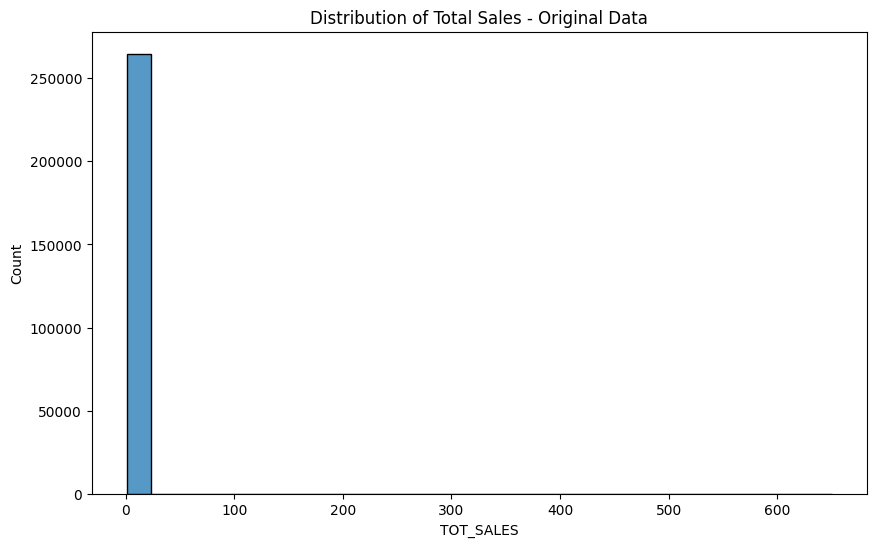

In [10]:
# Plot histograms for "TOT_SALES"
plt.figure(figsize=(10, 6))
sns.histplot(transaction['TOT_SALES'], bins = 30, kde=False)
plt.title('Distribution of Total Sales - Original Data')

Text(0.5, 0, 'Total Sales')

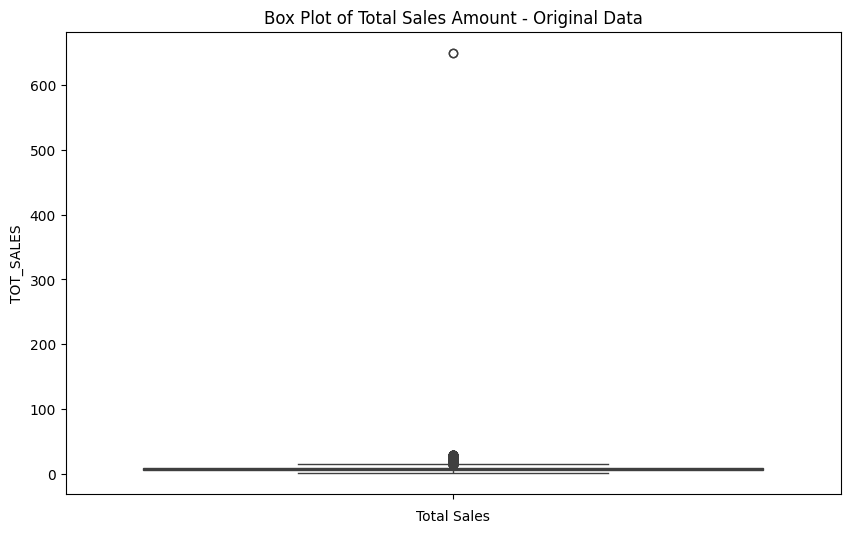

In [11]:
# Plot box plot for transaction amount
plt.figure(figsize=(10, 6))
sns.boxplot(y=transaction['TOT_SALES'])
plt.title('Box Plot of Total Sales Amount - Original Data')
plt.xlabel('Total Sales')

Investigate the records where `TOT_SALES` exceeds 600, as these represent clear outliers in the dataset.

In [12]:
# Slide the data which has TOT_SALES > 600
trans_outlier = transaction_df[transaction_df['TOT_SALES']>600].copy()
display(trans_outlier)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


##### Note: 
Since the product quantities align appropriately with the total sales, it suggests that this transaction is likely genuine rather than an error. However, such a large-volume purchase appears to be uncommon and does not represent typical daily sales patterns—it may be considered an outlier or a rare occurrence.

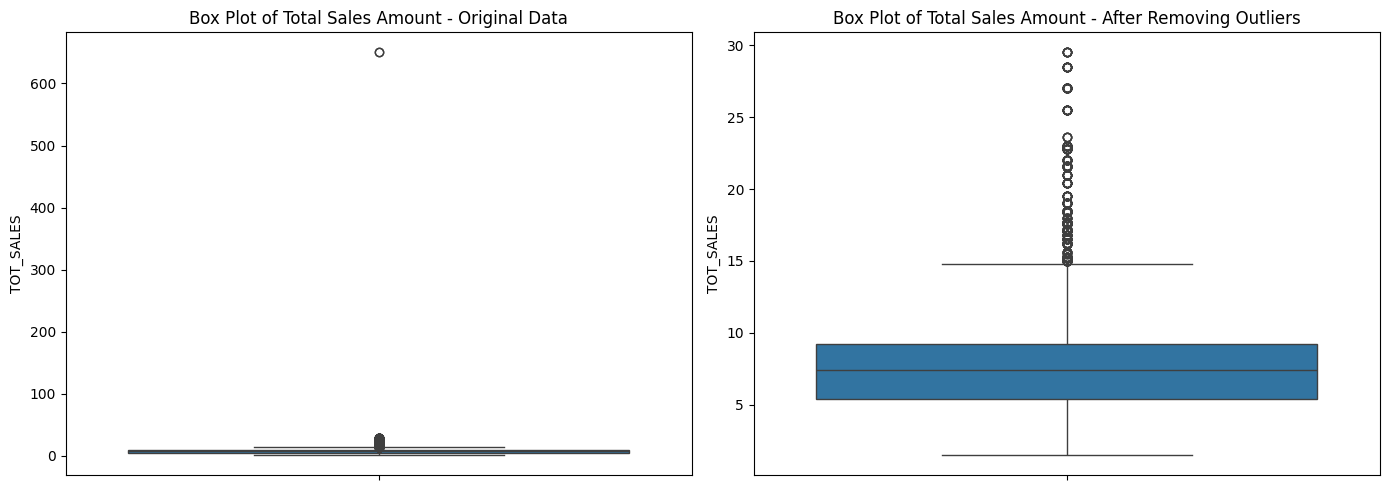

In [13]:
# Remove these outliers from the original data
transaction_df = transaction_df[transaction_df['TOT_SALES']<=600]

# Plot box plot for total sales after and before removing outliers    
fig, ax = plt.subplots(1,2, figsize = (14,5))
sns.boxplot(y=transaction['TOT_SALES'], ax=ax[0])
sns.boxplot(y=transaction_df['TOT_SALES'], ax=ax[1])
ax[0].set_title('Box Plot of Total Sales Amount - Original Data')
ax[1].set_title('Box Plot of Total Sales Amount - After Removing Outliers')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Total Sales')

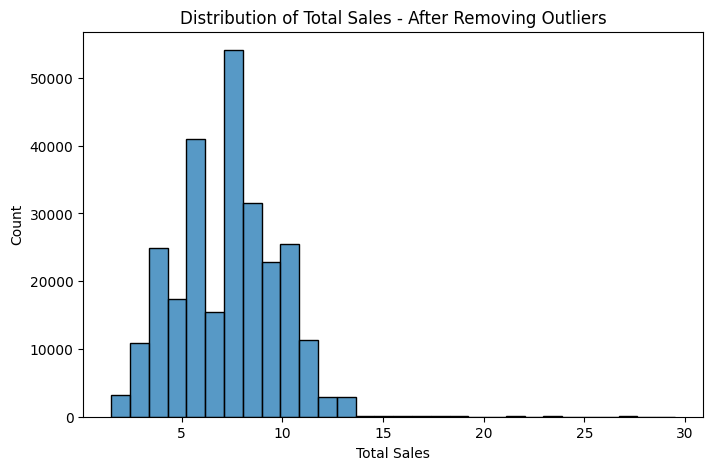

In [14]:
# Plot histograms for "TOT_SALES" after removing outliers
plt.figure(figsize=(8, 5))
sns.histplot(transaction_df['TOT_SALES'], bins = 30, kde=False)
plt.title('Distribution of Total Sales - After Removing Outliers')
plt.xlabel('Total Sales')


In [15]:
# # Check for outliers 
# def check_outliers(df,columns):
#     """ 
#     Arrgs: df - DataFrame, columns - list of columns to check for outliers.
#     Identifies outliers which are defined as values that fall outside of 5 times the interquartile range (IQR).
#     Returns a dictionary with column names as keys and outlier values as values.
#     """
#     outliers = {}
#     lower_limit = 0 
#     upper_limit = 0
#     for col in columns:
#         if col in df.columns:
#             # Calculate the interquartile range (IQR)
#             q1 = df[col].quantile(0.25)
#             q3 = df[col].quantile(0.75)
#             iqr = q3 - q1 

#             # Calculate lower and upper limits for outliers
#             lower_limit = q1 - 5.0*iqr 
#             upper_limit = q3 + 5.0*iqr
            
#             # Identify outliers
#             outliers_criteria = (df[col] < lower_limit) | (df[col] > upper_limit)
#             outliers[col] = df.loc[outliers_criteria,col].tolist()
#         else:
#             print(f'Column "{col}" not found in the DataFrame.')
#             continue
#     print('Rows with outliers: ')
#     display(outliers)

### 2.4. Data Cleaning Summary

| Step | Action Taken | Key Finding / Outcome | Affected Table(s) | Affected Column(s) |
| :--- | :--- | :--- | :--- | :--- |
| **1. Initial Examination & Identify missing value**| Performed a structural review of both datasets to check for nulls, data types, and unique values. | No missing values were found. The `DATE` column was identified as an Excel serial number. | `transaction`, `customer` | All |
| **2. Data Type Conversion** | Converted the `DATE` column from an integer format to a standard `datetime` object. | The `DATE` column is now usable for time-series analysis. | `transaction` | `DATE` |
| **3. Duplicate Handling** | Checked for and removed any rows that were complete duplicates across all columns. | Found and removed one fully duplicate row from the transaction data. The customer data was clean. | `transaction` | All |
| **4. Outlier Handling** | Investigated and removed two significant outliers based on their high sale value. | Removed two transactions of $650.00 each, as they represented non-typical purchasing behavior. | `transaction` | `TOT_SALES` |

**Overall Result:** Both datasets are now clean, correctly formatted, and ready for feature engineering and further analysis.

In [16]:
print('"Transaction" data examination after cleaning:')
display(examine_data(transaction_df))
print('\n')
print('"Customer"data examination after cleaning:')
display(examine_data(customer_df))

"Transaction" data examination after cleaning:


,rows_count,rows_with_nulls,unique,cardinality,with_nulls,null_%,1st_row,last_row,random_row,data_type
DATE,264833,0,False,364,False,0.0,2018-10-17 00:00:00,2018-09-22 00:00:00,2018-11-12 00:00:00,datetime64[ns]
STORE_NBR,264833,0,False,272,False,0.0,1,272,88,int64
LYLTY_CARD_NBR,264833,0,False,72636,False,0.0,1000,272380,88172,int64
TXN_ID,264833,0,False,263125,False,0.0,1,270189,87073,int64
PROD_NBR,264833,0,False,114,False,0.0,5,74,40,int64
PROD_NAME,264833,0,False,114,False,0.0,Natural Chip Compny SeaSalt175g,Tostitos Splash Of Lime 175g,Thins Chips Seasonedchicken 175g,object
PROD_QTY,264833,0,False,5,False,0.0,2,2,2,int64
TOT_SALES,264833,0,False,111,False,0.0,6.0,8.8,6.6,float64




"Customer"data examination after cleaning:


,rows_count,rows_with_nulls,unique,cardinality,with_nulls,null_%,1st_row,last_row,random_row,data_type
LYLTY_CARD_NBR,72637,0,True,72637,False,0.0,1000,2373711,236192,int64
LIFESTAGE,72637,0,False,7,False,0.0,YOUNG SINGLES/COUPLES,YOUNG SINGLES/COUPLES,YOUNG SINGLES/COUPLES,object
PREMIUM_CUSTOMER,72637,0,False,3,False,0.0,Premium,Mainstream,Budget,object


In [ ]:
# Export the clean dataset 
transaction_df.to_csv('./Dataset/Prepared/clean_QVI_transaction_data.csv',index=False)
customer_df.to_csv('./Dataset/Prepared/clean_QVI_purchase_behaviour.csv',index=False)

### **3. Exploratory Data Analysis (EDA)**

#### **3.1. Dataset Overall**
- Time window of the dataset

In [17]:
# Last and Earlisest purchase date
earliest_date = transaction_df['DATE'].min()
latest_date = transaction_df['DATE'].max()

print(f'Earliest purchase date: {earliest_date}')
print(f'Latest purchase date: {latest_date}')


Earliest purchase date: 2018-07-01 00:00:00
Latest purchase date: 2019-06-30 00:00:00


- Dataset Scope and Summary

In [18]:
# Dataset information 
data_dictionary = pd.DataFrame({
   'Earliest time period': earliest_date,
   'Latest time period': latest_date,
   'Number of products avaliable': transaction_df['PROD_NAME'].nunique(),
   'Number of card owners': customer_df['LYLTY_CARD_NBR'].nunique(),
   'Loyalty membership type': customer_df['PREMIUM_CUSTOMER'].nunique()
},index=[0])
print('Key Dataset Characteristics:')
display(data_dictionary)


Key Dataset Characteristics:


,Earliest time period,Latest time period,Number of products avaliable,Number of card owners,Loyalty membership type
0,2018-07-01,2019-06-30,114,72637,3


- Customer type & Life stage

In [19]:
# Extract Premium Customers and Lifestage unique values 
customer_type = pd.DataFrame(customer_df['PREMIUM_CUSTOMER'].unique(), columns=['Customer type'])
lifestage_type = pd.DataFrame(customer_df['LIFESTAGE'].unique(), columns=['Lifestage type'])

print('Customer type: ')
display(customer_type)

print('Lifestage type:')
display(lifestage_type)

Customer type: 


,Customer type
0,Premium
1,Mainstream
2,Budget


Lifestage type:


,Lifestage type
0,YOUNG SINGLES/COUPLES
1,YOUNG FAMILIES
2,OLDER SINGLES/COUPLES
3,MIDAGE SINGLES/COUPLES
4,NEW FAMILIES
5,OLDER FAMILIES
6,RETIREES


- Examine product type 

In [20]:
# Display product types 
transaction_df['PROD_NAME'] = transaction_df['PROD_NAME'].str.replace(r'\s+',' ', regex = True)

product_df = transaction_df[['PROD_NAME', 'PROD_NBR']].drop_duplicates().reset_index(drop=True)
display(product_df.head())


,PROD_NAME,PROD_NBR
0,Natural Chip Compny SeaSalt175g,5
1,CCs Nacho Cheese 175g,66
2,Smiths Crinkle Cut Chips Chicken 170g,61
3,Smiths Chip Thinly S/Cream&Onion 175g,69
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,108


In [21]:
# Create packaging columns  
product_df['PACK_SIZE'] = product_df['PROD_NAME'].str.extract(r'(\d+)')
product_df

,PROD_NAME,PROD_NBR,PACK_SIZE
0,Natural Chip Compny SeaSalt175g,5,175
1,CCs Nacho Cheese 175g,66,175
2,Smiths Crinkle Cut Chips Chicken 170g,61,170
3,Smiths Chip Thinly S/Cream&Onion 175g,69,175
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,108,150
...,...,...,...
109,Red Rock Deli Chikn&Garlic Aioli 150g,58,150
110,RRD SR Slow Rst Pork Belly 150g,10,150
111,RRD Pc Sea Salt 165g,11,165
112,Smith Crinkle Cut Bolognese 150g,43,150


In [22]:
# Find the brand name from Product name 
# Extract a series of product names 
product_df['Brand_candidates'] = product_df['PROD_NAME'].str.split(' ', n=1).str[0]

brand_summary = product_df.groupby('Brand_candidates')['PROD_NAME'].agg(count = 'size', concatenated = lambda x: ', '.join(x)).reset_index()
brand_summary = brand_summary.sort_values(by='count', ascending=False)

display(brand_summary)

,Brand_candidates,count,concatenated
20,Smiths,16,"Smiths Crinkle Cut Chips Chicken 170g, Smiths ..."
12,Kettle,13,"Kettle Tortilla ChpsHny&Jlpno Chili 150g, Kett..."
6,Doritos,9,"Doritos Corn Chip Mexican Jalapeno 150g, Dorit..."
17,RRD,8,"RRD Chilli& Coconut 150g, RRD Sweet Chilli & S..."
16,Pringles,8,"Pringles Sthrn FriedChicken 134g, Pringles Swe..."
27,WW,7,"WW Crinkle Cut Chicken 175g, WW Original Corn ..."
23,Thins,5,"Thins Chips Light& Tangy 175g, Thins Chips Ori..."
14,Natural,4,"Natural Chip Compny SeaSalt175g, Natural ChipC..."
18,Red,4,"Red Rock Deli Thai Chilli&Lime 150g, Red Rock ..."
10,Infuzions,4,"Infuzions Thai SweetChili PotatoMix 110g, Infu..."


In [ ]:
# brand_summary.to_csv('Dataset/brand_summary.csv', index=False)

In [23]:
# Create a mapping dictionary for brands
brand_mapping = {
    'Smiths': 'Smiths',
    'Kettle': 'Kettle',
    'Doritos': 'Doritos',
    'RRD': 'Red Rock Deli',
    'Pringles': 'Pringles',
    'WW': 'Woolworths',
    'Thins': 'Thins Chips',
    'Natural': 'Natural Chip Co',
    'Red': 'Red Rock Deli', # Map 'Red' to the full name
    'Infuzions': 'Infuzions',
    'CCs': 'CCs',
    'Twisties': 'Twisties',
    'Tostitos': 'Tostitos',
    'Old': 'Old El Paso',
    'Woolworths': 'Woolworths',
    'Cobs': 'Cobs Popd',
    'Grain': 'Grain Waves',
    'Smith': 'Smiths', # Map 'Smith' to the full name
    'Cheezels': 'Cheezels',
    'Tyrrells': 'Tyrrells',
    'Cheetos': 'Cheetos',
    'NCC': 'Natural Chip Co', # Map 'NCC' to the full name
    'Infzns': 'Infuzions', # Correcting the abbreviation
    'GrnWves': 'Grain Waves', # Correcting the abbreviation
    'French': 'French Fries',
    'Snbts': 'Sunbites',
    'Sunbites': 'Sunbites',
    'Dorito': 'Doritos',
    'Burger': 'Burger Rings'
}

# Map the brand names in the DataFrame
product_df['BRAND'] = product_df['Brand_candidates'].map(brand_mapping)

# Drop the 'Brand_candidates' column as it's no longer needed
product_df = product_df.drop(columns=['Brand_candidates'])
# Display the results
display(product_df)

,PROD_NAME,PROD_NBR,PACK_SIZE,BRAND
0,Natural Chip Compny SeaSalt175g,5,175,Natural Chip Co
1,CCs Nacho Cheese 175g,66,175,CCs
2,Smiths Crinkle Cut Chips Chicken 170g,61,170,Smiths
3,Smiths Chip Thinly S/Cream&Onion 175g,69,175,Smiths
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,108,150,Kettle
...,...,...,...,...
109,Red Rock Deli Chikn&Garlic Aioli 150g,58,150,Red Rock Deli
110,RRD SR Slow Rst Pork Belly 150g,10,150,Red Rock Deli
111,RRD Pc Sea Salt 165g,11,165,Red Rock Deli
112,Smith Crinkle Cut Bolognese 150g,43,150,Smiths


In [24]:
# Print number of Brands and packaging availables
product_summarize = pd.DataFrame({
    "Total Avail. Brand ": [product_df['BRAND'].nunique()],
    "Total packaging size type": [product_df['PACK_SIZE'].nunique()],
    "Total Avail Product": [product_df['PROD_NAME'].nunique()]
}, index=[0])
display(product_summarize)

,Total Avail. Brand,Total packaging size type,Total Avail Product
0,21,21,114


In [ ]:
# Export product information datafram 
# product_df.to_csv("./Dataset/Prepared/product_info.csv",index=False)

#### **3.2. Business Metrics**

##### **3.2.1. Sales and Customer base Trend Overtime**

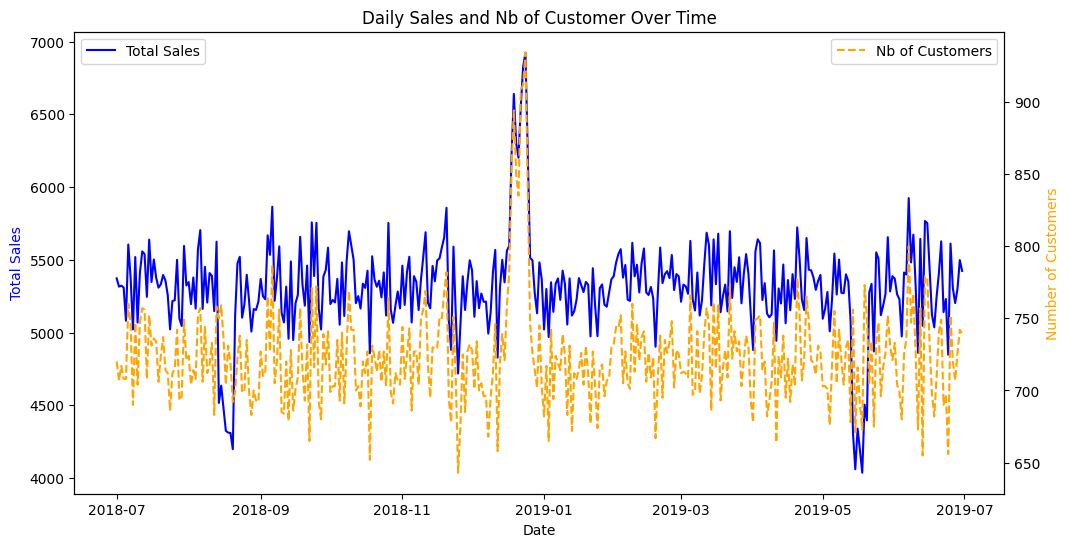

In [29]:
# Prepare daily sales data 
daily_sales = transaction_df.groupby('DATE')['TOT_SALES'].sum().reset_index()
# Prepare daily customer data 
daily_customer = transaction_df.groupby('DATE')['LYLTY_CARD_NBR'].nunique().reset_index()

# Plot daily sales data 
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['DATE'], daily_sales['TOT_SALES'], linestyle='-', color='b')
plt.xlabel('Date')
# Add a second y-axis for number of customers
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(daily_customer['DATE'], daily_customer['LYLTY_CARD_NBR'], linestyle='--', color='orange', label='Nb of Customers')
ax2.set_ylabel('Number of Customers', color='orange')
ax1.set_ylabel('Total Sales', color='b')
ax1.legend(['Total Sales'], loc='upper left')
ax2.legend(['Nb of Customers'], loc='upper right')
plt.title('Daily Sales and Nb of Customer Over Time')
plt.show()

Zoom in period such as 2018-07 to 2018-09 and 2018-12 to 2019-02, 2019-05 - 2019-07 for further investigation

In [ ]:
# # Assgin start and end dates 
# start_date_1 = '2018-08-01'
# end_date_1 = '2018-09-1'

# start_date_2 = '2018-12-10'
# end_date_2 = '2019-01-15'

# start_date_3 = '2019-05-01'
# end_date_3 = '2019-05-30'

# # Plot sales for each period
# fig,ax = plt.subplots(3, 1, figsize=(10, 12))

# for ax, (start_date, end_date) in zip(ax, [(start_date_1, end_date_1), (start_date_2, end_date_2), (start_date_3, end_date_3)]):
#     period_sales = daily_sales[start_date:end_date]
#     ax.plot(period_sales.index, period_sales.values, linestyle='-', color='b')
#     ax.set_title(f'Sales from {start_date} to {end_date}')
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Total Sales')




##### **3.2.2. Customer analysis**

In [ ]:
# Prepare df number of customer by customer type 
customer_by_type = customer_df.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].count().reset_index()

# Plot the oie chart for customer by type 
plt.figure(figsize=(6, 6))
plt.pie(customer_by_type['LYLTY_CARD_NBR'], labels=customer_by_type['PREMIUM_CUSTOMER'], autopct='%1.1f%%', startangle=90)
plt.title('Customer Distribution by Type')
plt.axis('equal')
plt.show()

In [ ]:
# Prepare data for stacked bar chart
customer_counts = customer_df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['LYLTY_CARD_NBR'].count().unstack(fill_value=0).transpose()

# Sort table by total number of customer
customer_counts['Total'] = customer_counts.sum(axis=1)
customer_counts = customer_counts.sort_values('Total', ascending=False)

# Drop Total customer for plotting
customer_plot = customer_counts.drop(columns='Total')

# Plot stacked bar chart
customer_plot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Customer Count by Type and Lifestage')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.legend(title='Lifestage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the percentage of each customer lifestage overall
customer_lifestage_counts = customer_df.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].count().reset_index()
customer_lifestage_counts['Percentage'] = (customer_lifestage_counts['LYLTY_CARD_NBR'] / customer_lifestage_counts['LYLTY_CARD_NBR'].sum()) * 100
customer_lifestage_counts['Percentage'] = round(customer_lifestage_counts['Percentage'], 2)
# Sort the DataFrame by percentage
customer_lifestage_counts = customer_lifestage_counts.sort_values(by='Percentage', ascending=False)

display(customer_lifestage_counts)

In [ ]:
# Calculate the percentage of each customer type overall
total_customer = customer_df['LYLTY_CARD_NBR'].nunique()
customer_pct = customer_counts.drop(columns='Total')
customer_pct = customer_pct.div(total_customer).multiply(100).round(2)
display(customer_pct)


customer_pct = customer_pct.transpose()  # Transpose for better visualization
# Plot the heatmap for customer percentage by type and lifestage
plt.figure(figsize=(8, 5))
sns.heatmap(customer_pct, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Percentage (%)'})
plt.title('Customer Percentage by Type and Lifestage')
plt.xlabel('Customer Type')
plt.ylabel('Lifestage')
plt.xticks(rotation=45)



In [ ]:
# Merge transaction table with customer data 
merge_df = transaction_df.merge(customer_df,on = "LYLTY_CARD_NBR", how = "left")

In [ ]:
# Summarize sales by customer PREMIUM_CUSTOMER
sales_by_customer = merge_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()

# Summarize product quantities by PREMIUM_CUSTOMER 
qty_by_customer = merge_df.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].sum().reset_index()

# Summarize transaction amounts by PREMIUM_CUSTOMER
trans_by_customer = merge_df.groupby('PREMIUM_CUSTOMER')['TXN_ID'].nunique().reset_index()

# Summarize transaction values by PREMIUM_CUSTOMER by devide tot_sales by number of transactions
value_by_customer = sales_by_customer.merge(trans_by_customer, on='PREMIUM_CUSTOMER')
value_by_customer['TRANS_VALUE'] = value_by_customer['TOT_SALES'] / value_by_customer['TXN_ID']


# Plot 3 bar charts 
fig, ax = plt.subplots(2, 2, figsize=(8, 5), sharex=True)
sales_by_customer.plot(kind='bar', x='PREMIUM_CUSTOMER', y='TOT_SALES', ax=ax[0,0], color='skyblue')
qty_by_customer.plot(kind='bar', x='PREMIUM_CUSTOMER', y='PROD_QTY', ax=ax[0,1], color='lightgreen')
trans_by_customer.plot(kind='bar', x='PREMIUM_CUSTOMER', y='TXN_ID', ax=ax[1,0], color='salmon')
value_by_customer.plot(kind='bar', x='PREMIUM_CUSTOMER',y='TRANS_VALUE', ax=ax[1,1], color='pink')
# Customize the plots
ax[0,0].set_title('Total Sales by Customer Type')
ax[0,0].set_ylabel('Total Sales')
ax[0,1].set_title('Total Quantity by Customer Type')
ax[0,1].set_ylabel('Total Quantity')
ax[1,0].set_title('Total Transactions by Customer Type')
ax[1,0].set_ylabel('Total Transactions')
ax[1,1].set_title('Average Transaction Value by Customer Type')
ax[1,1].set_ylabel('Avg. Transaction Value')

# Remove legends
for axes in ax.flat:
    axes.get_legend().remove()

# Custommize x-axis labels
for axis in ax[1]:
    axis.set_xticklabels(axis.get_xticklabels(), rotation = 360)

plt.tight_layout()
plt.show()


In [ ]:
# Summarize sales by customer lifestage
sales_by_lifestage = merge_df.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()

# Summarize product quantities by lifestage 
qty_by_lifestage = merge_df.groupby('LIFESTAGE')['PROD_QTY'].sum().reset_index()

# Summarize transaction amounts by lifestage
trans_by_lifestage = merge_df.groupby('LIFESTAGE')['TXN_ID'].nunique().reset_index()

# Summarize transaction values by lifestage by devide tot_sales by number of transactions
value_by_lifestage = sales_by_lifestage.merge(trans_by_lifestage, on='LIFESTAGE')
value_by_lifestage['TRANS_VALUE'] = value_by_lifestage['TOT_SALES'] / value_by_lifestage['TXN_ID']

# Plot 3 bar charts 
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
sales_by_lifestage.plot(kind='bar', x='LIFESTAGE', y='TOT_SALES', ax=ax[0,0], color='skyblue')
qty_by_lifestage.plot(kind='bar', x='LIFESTAGE', y='PROD_QTY', ax=ax[0,1], color='lightgreen')
trans_by_lifestage.plot(kind='bar', x='LIFESTAGE', y='TXN_ID', ax=ax[1,0], color='salmon')
value_by_lifestage.plot(kind='bar', x='LIFESTAGE',y='TRANS_VALUE', ax=ax[1,1], color='pink')

# Customize the plots
ax[0,0].set_title('Total Sales by Lifestage')
ax[0,0].set_ylabel('Total Sales')
ax[0,1].set_title('Total Quantity by Lifestage')
ax[0,1].set_ylabel('Total Quantity')
ax[1,0].set_title('Total Transactions by Lifestage')
ax[1,0].set_ylabel('Total Transactions')
ax[1,1].set_title('Average Transaction Value by Lifestage')
ax[1,1].set_ylabel('Average Transaction Value')
for axes in ax.flat:
    axes.get_legend().remove()

# Custommize x-axis labels
for axis in ax[1]:
    axis.set_xticklabels(axis.get_xticklabels(), rotation = 20, fontsize = 8)


plt.tight_layout()
plt.show()


In [ ]:
# Assign top and bottom segment in a variables 

top_segments = sales_by_lifestage.sort_values('TOT_SALES', ascending=False).head(3)['LIFESTAGE'].tolist()
bottom_segments = sales_by_lifestage.sort_values('TOT_SALES', ascending= False).tail(2)['LIFESTAGE'].tolist()

In [ ]:
# Prepare the dataframe for heatmap
segment_heatmap = merge_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack(fill_value=0).transpose()
segment_heatmap = segment_heatmap.div(merge_df['TOT_SALES'].sum()).multiply(100).round(2)


# Get the lifestage order from sales_by_lifestage, from largest to smallest sales 
lifestage_rank = sales_by_lifestage.sort_values(by="TOT_SALES", ascending=False)['LIFESTAGE'].tolist()
segment_heatmap = segment_heatmap[lifestage_rank]

# Plot the heatmap 
plt.figure(figsize=(8,5))
sns.heatmap(segment_heatmap,annot=True, fmt = ".2f",cbar_kws={'label': 'Percentage (%)'}, cmap = 'plasma')
plt.title("Sales by Customer Segmentation")
plt.ylabel("Customer Type")
plt.xlabel("Lifestage")
plt.xticks(rotation=20, fontsize=6)

display(segment_heatmap)



##### **Initial Analysis:**
- **1. Top Three Sales Drivers:** The market is dominated by three distinct segments, which together account for over a quarter of all sales:
    - **Budget - Older Families (8.71%):** This is the single most valuable segment, indicating that price-conscious families are a core driver of sales volume.
    - **Mainstream - Young Singles/Couples (8.15%):** This group represents a significant high-spending segment, likely with more disposable income.
    - **Mainstream - Retirees (8.05%):** This segment also contributes heavily, showing strong and consistent purchasing behavior.

- **2. Mid-tier segments:** Mainstream - Older Families (5.35%) and Premium - Older Singles/Couples (5.05%). 

- **3. Under-performing segments:** New Families and Mid-age Singles/Couples